In [23]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import scanpy as sc
import scvelo as scv
import scipy as scp
import pandas as pd
import anndata as ad
import numpy as np
scv.logging.print_version()

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.1.24 (python 3.7.3) on 2020-01-29 11:43.


In [10]:
adata = scv.read('finalConcatanatedData.h5ad')
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.8 0.2]


AnnData object with n_obs × n_vars = 23585 × 60623 
    layers: 'spliced', 'unspliced'

In [13]:
# remove duplicated values that have different conditions
phenoDat = pd.read_csv('phenoSCCall.csv')
phenoDat.drop('Unnamed: 0',axis=1, inplace=True)
print(phenoDat.shape)
dup = phenoDat.duplicated('barcodes',keep=False)
dupPhenoDat = phenoDat.loc[dup,:]
dup2 = dupPhenoDat.duplicated(['barcodes','treatment'],keep=False)
dupKeep = dupPhenoDat.loc[dup2,:].sort_values('barcodes')
remove = [x for x in list(dupPhenoDat.index) if x not in list(dupKeep.index)]
pD = phenoDat.drop(remove,axis = 0)
print(pD.shape)
len(set(pD['barcodes']))

(23914, 4)
(23573, 4)


23415

In [20]:
remove = []
for i,obsName in enumerate(adata.obs.index):
    if obsName not in list(pD['barcodes']):
        remove.append(i)
remove

[425,
 459,
 468,
 473,
 616,
 640,
 687,
 1019,
 1068,
 1103,
 1374,
 1503,
 1509,
 1580,
 1616,
 1636,
 1972,
 2102,
 2399,
 2413,
 2442,
 2647,
 3225,
 3414,
 3506,
 3537,
 3968,
 4142,
 4383,
 4446,
 4483,
 4755,
 4853,
 4869,
 5004,
 5275,
 5285,
 5503,
 5562,
 5621,
 5832,
 5905,
 5987,
 5989,
 6290,
 6316,
 6389,
 6861,
 6871,
 6971,
 7076,
 7240,
 7506,
 7539,
 7551,
 7621,
 7799,
 7873,
 7929,
 8018,
 8055,
 8100,
 8232,
 8353,
 8362,
 8613,
 8618,
 8916,
 9028,
 9291,
 9428,
 9493,
 9676,
 9693,
 9712,
 9750,
 9772,
 9778,
 9925,
 9981,
 9982,
 10006,
 10282,
 10293,
 10321,
 10648,
 10969,
 11547,
 11644,
 11771,
 12077,
 12329,
 12338,
 12400,
 12676,
 12731,
 12882,
 12956,
 12995,
 13027,
 13112,
 13202,
 13219,
 13280,
 13395,
 13513,
 13591,
 14232,
 14491,
 14497,
 14568,
 14731,
 15163,
 15205,
 15329,
 15424,
 15766,
 15902,
 16311,
 16326,
 16478,
 16497,
 16531,
 16539,
 16584,
 16690,
 16965,
 17214,
 17307,
 17330,
 17348,
 17475,
 17704,
 17944,
 18224,
 18631,


In [26]:
#remove these indices
X = adata.X.toarray()
X = np.delete(X,remove,axis=0)
X = scp.sparse.csr_matrix(X)
S = adata.layers['spliced'].toarray()
S = np.delete(S,remove,axis=0)
S = scp.sparse.csr_matrix(S)
U = adata.layers['unspliced'].toarray()
U = np.delete(U,remove,axis=0)
U = scp.sparse.csr_matrix(U)

In [30]:
obsNames = [x for i,x in enumerate(adata.obs.index) if i not in remove]
var_names = list(adata.var.index)
concatAdata = ad.AnnData(X,
              {'obs_names': obsNames},
              {'var_names': var_names},
               layers={'spliced':S,
                      'unspliced':U})
filename = 'finalCleanConcatanatedData.h5ad'
print('final adata is:')
print(concatAdata)
print('writing file ' + filename)
concatAdata.write(filename)

final adata is:
AnnData object with n_obs × n_vars = 23415 × 60623 
    layers: 'spliced', 'unspliced'
writing file finalCleanConcatanatedData.h5ad


In [33]:
adata = ad.read_h5ad('finalCleanConcatanatedData.h5ad')
adata

AnnData object with n_obs × n_vars = 23415 × 60623 
    layers: 'spliced', 'unspliced'

https://scvelo-notebooks.readthedocs.io/DentateGyrus.html

In [34]:
adata.var

""
index
ENSG00000001460.18
ENSG00000001461.17
ENSG00000010072.16
ENSG00000008118.10
ENSG00000009780.15
ENSG00000048707.15
ENSG00000034971.17
ENSG00000059588.10
ENSG00000041988.15


In [32]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 45992 genes that are detected in less than 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:10) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [5]:
adata

AnnData object with n_obs × n_vars = 23585 × 2000 
    obs: 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_settings'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'

In [4]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:12) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
scv.tl.velocity_graph(adata)
adata

computing velocity graph
    finished (0:02:37) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 23585 × 2000 
    obs: 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_settings', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'

In [8]:
sc.tl.umap(adata)

In [8]:
adata.write_h5ad('finaladataWithVelocity.h5ad')

computing velocity embedding
    finished (0:00:06) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


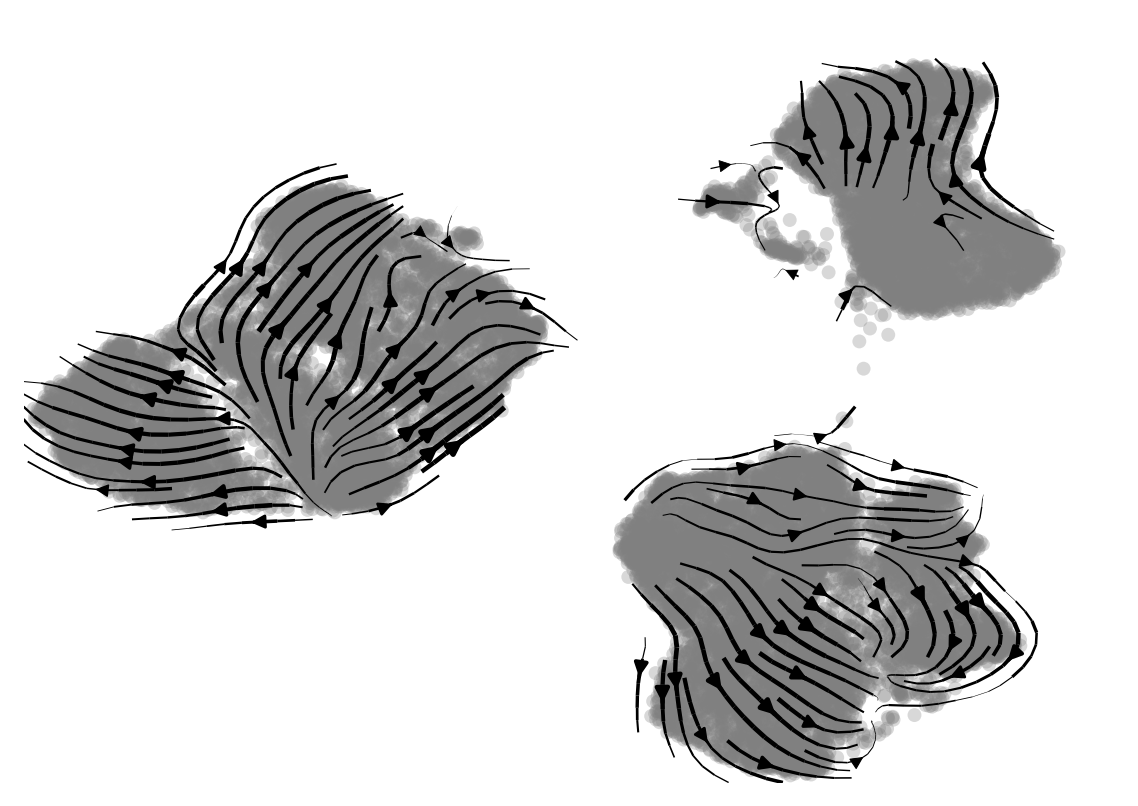

In [9]:
scv.pl.velocity_embedding_stream(adata, basis='umap')